In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

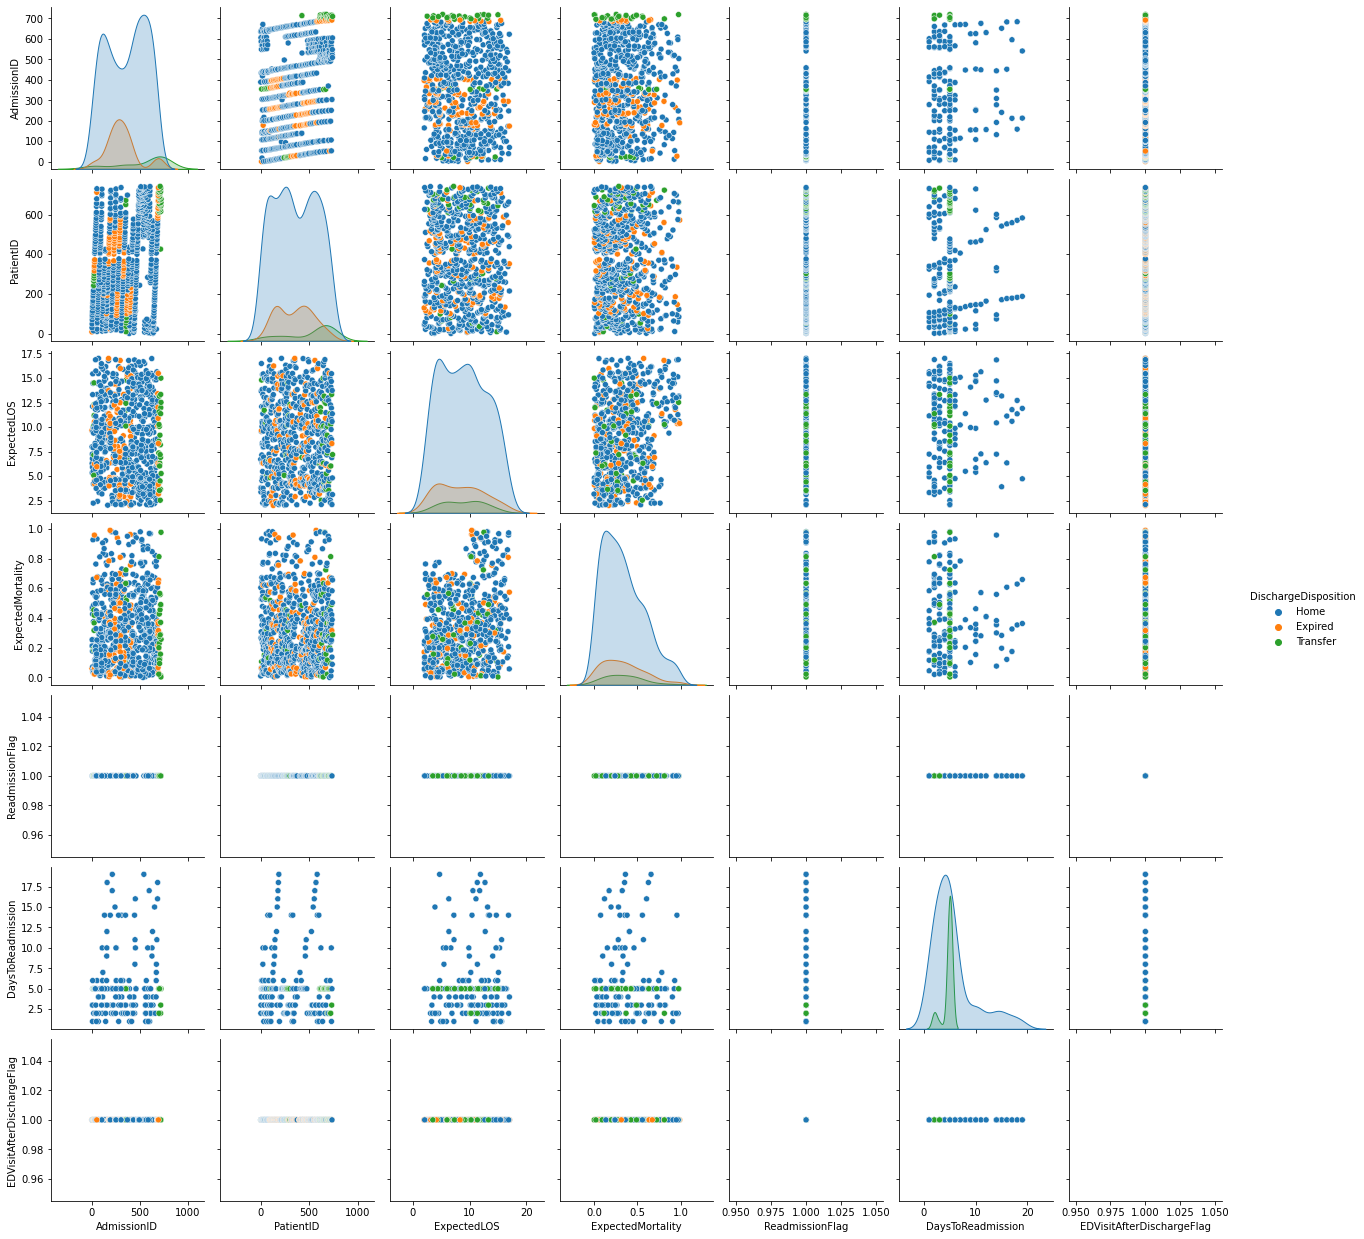

In [6]:
# 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.
df_RR = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "ReAdmissionRegistry")
sns.pairplot(df_RR, hue = 'DischargeDisposition')
plt.show()

# Findings:
# The patients who are discharged are greater in comparison to other patients who are discharged or transferred.
# Patients who expired had longer Llength Of Stay(LOS).
# If the Expected LOS is more, Expected Mortality is also more.

In [7]:
# 2.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.
df_P = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "Patients")
df_P.iloc[101:201 , 1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


Text(0, 0.5, 'y-axis')

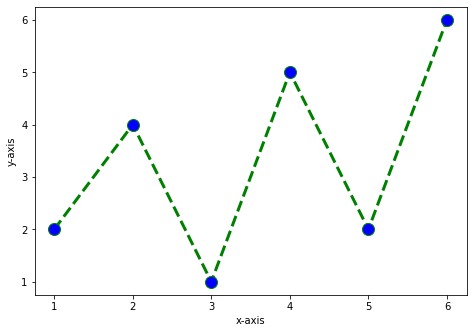

In [9]:
#3."Create a figure object called fig using plt.figure() **  
#** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** 
#** Plot (x,y) on that axes and set the labels.  Note : You can plot on any x,y set of values."

x = [1,2,3,4,5,6]
y = [2,4,1,5,2,6]
fig = plt.figure()
ax = fig.add_axes([0., 0., 1., 1., ])
ax.plot(x,y,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

In [12]:
# 4.Display data by splitting age in 4 quartiles and labeling the quartiles.
import pandas as pd
from datetime import datetime,date

df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = df["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    df["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
df['Age'] = df_dob.apply(age)

q = df.quantile([0.00, 0.25, 0.50, 0.75, 1.00])

col = 'Age'

q1 = df[((df[col]>=q[col][0.00]) & (df[col]<q[col][0.25]))]
q2 = df[((df[col]>=q[col][0.25]) & (df[col]<q[col][0.50]))]
q3 = df[((df[col]>=q[col][0.50]) & (df[col]<q[col][0.75]))]
q4 = df[((df[col]>=q[col][0.75]) & (df[col]<=q[col][1.00]))]
print('Quartile 1')
print(q1)
print('Quartile 2')
print(q2)
print('Quartile 3')
print(q3)
print('Quartile 4')
print(q4)

Quartile 1
     PatientID FirstName    LastName             DateOfBirth  Gender  \
1            2       Far       Myers 1985-11-15 02:08:42.090    Male   
17          18    Sheena       Kevin 1983-01-20 20:40:26.024    Male   
23          24  Gabriel       Joseph 1986-05-31 09:36:05.716    Male   
24          25  Lincoln       Brenda 1986-07-24 17:36:00.791    Male   
29          30       Ala     Halpert 1986-11-26 10:44:22.628  Female   
..         ...       ...         ...                     ...     ...   
922        923  Rebbecca  Rollingson 1986-09-29 11:58:56.983    Male   
923        924    Daniel    Shakesby 1980-11-28 17:57:03.702    Male   
937        938       Des      Scrace 1985-06-09 19:09:47.265    Male   
940        941       Wat     Fideler 1986-05-26 00:01:19.761    Male   
942        943   Diahann     Smeeton 1983-01-08 21:49:27.884    Male   

                       Race Language  Age  
1                     White  English   36  
17                    White  Spanish

In [1]:
# 5. Display full name of patients who are born in 1986.
import pandas as pd
from datetime import date
df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Patients")
df['year'] = pd.DatetimeIndex(df['DateOfBirth']).year
newdf = df[df.year == 1986]
filtered_df = newdf.loc[:,['FirstName','LastName','year']]
filtered_df

,FirstName,LastName,year
23,Gabriel,Joseph,1986
24,Lincoln,Brenda,1986
29,Ala,Halpert,1986
72,Lolita,Darci,1986
164,Fadel,Bernardt,1986
238,Bentley,Kippax,1986
367,Vale,Olanda,1986
373,Britt,Dureden,1986
386,Cristabel,Chatel,1986
415,Constantia,Group,1986


<Figure size 720x360 with 0 Axes>

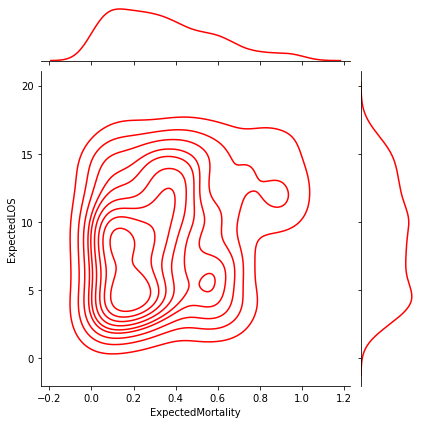

In [23]:
#6.Create a jointplot on expected mortality & expected length of stay.

#To read readmissionregistry sheet

readmissiondf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="ReAdmissionRegistry")

# fix size of the chart

fig = plt.figure(figsize = (10, 5))

#code for jointplot on expected mortality & expected length of stay
sns.jointplot(x=readmissiondf.ExpectedMortality, y=readmissiondf.ExpectedLOS,
              kind='kde',
              color='red')
#to show the chart
plt.show()

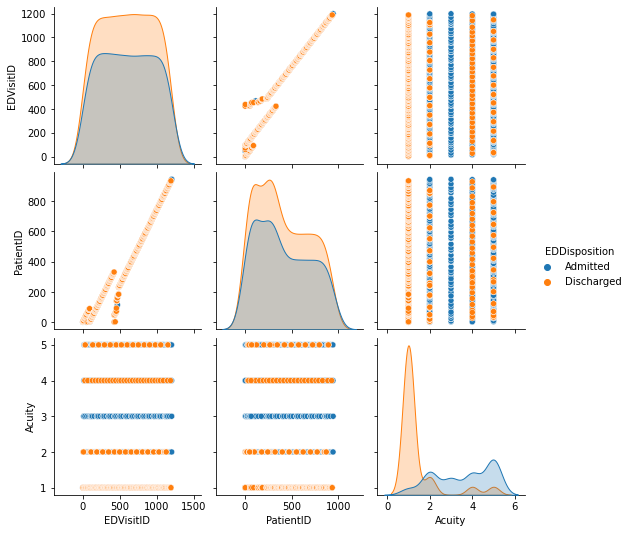

In [24]:
#7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

# To read edvisits sheet
edvisitsdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="EDVisits")

# code for pair plot on whole dataframe by taking parameter "hue" as EDDisposition
sns.pairplot(edvisitsdf,
              hue='EDDisposition')
#to show the chart
plt.show()

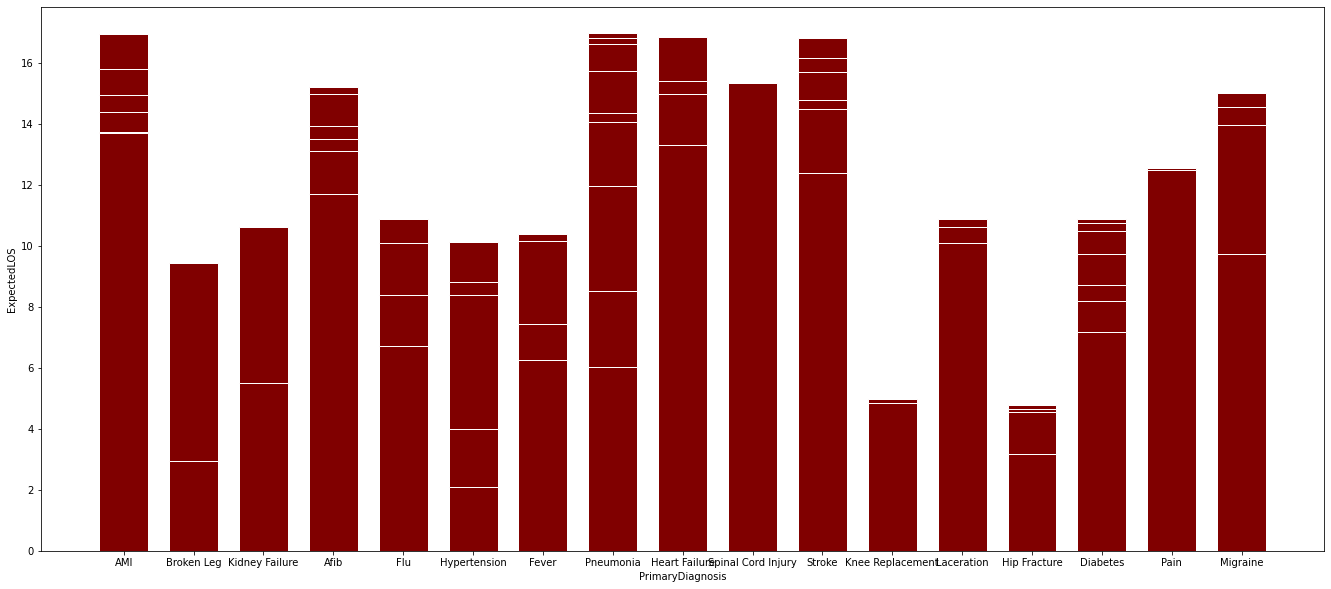

In [5]:
#8.Create a bar chart between expectedLOS & Primary diagnosis.
dischargesdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")
#To fix the plot size

fig = plt.figure(figsize = (23, 10))

#To declare Variable
x=dischargesdf.PrimaryDiagnosis
y=dischargesdf.ExpectedLOS

# creat a bar chart
plt.bar(x,y,color='maroon', width=0.7,edgecolor='white')

# To Put label for axis
plt.xlabel("PrimaryDiagnosis")
plt.ylabel("ExpectedLOS")
# To show chart
plt.show()

In [26]:
#9.Get the list of patient ID's which are not there in ReadmissionRegistry.

# To create Dataframe for each worksheet

patientdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Patients")
readmissiondf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="ReAdmissionRegistry")

# creating list of PatientID
Notinreadmission= patientdf.PatientID[~(patientdf['PatientID'].isin(readmissiondf['PatientID']))].reset_index(drop=False)

#to show the result
print(Notinreadmission)

     index  PatientID
0        3          4
1      134        135
2      144        145
3      188        189
4      199        200
..     ...        ...
236    940        941
237    941        942
238    942        943
239    943        944
240    944        945

[241 rows x 2 columns]


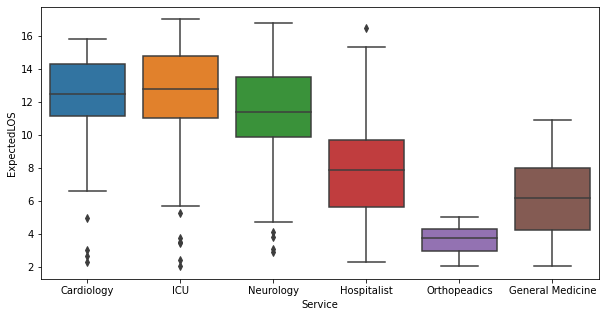

In [27]:
#10.Create a boxplot on ExpectedLOS by taking service into account.
dischargesdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")

fig = plt.figure(figsize = (10, 5))
# To create a boxplot
sns.boxplot(x=dischargesdf.Service,y=dischargesdf.ExpectedLOS)
 
plt.show()

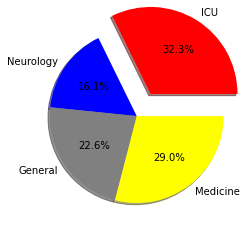

In [29]:
#11 Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.
y = np.array([10,5,7,9])
mylabels = ["ICU", "Neurology", "General", "Medicine"]
myexplode = [0.3,0,0,0]
c1 = ['Red','blue','grey','yellow']
plt.pie(y,labels = mylabels,explode = myexplode, shadow = True,autopct='%2.1f%%',colors = c1)
plt.show()

In [41]:
pip install psycopg2


Note: you may need to restart the kernel to use updated packages.


In [42]:
#12.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.
import psycopg2

conn = psycopg2.connect(
   database="HospitalDB_New", user='postgres', password='deepseaor', host='::1', port= 5432
)
cursor = conn.cursor()
sql_command = '''Select "ProviderName" from "Providers" where "ProviderName" like 'T%' '''

cursor.execute(sql_command)
print(cursor.fetchall())
conn.commit()
cursor.close()
conn.close()

[('Ted Texas',), ('Ted Green',), ('Ted Black',), ('Tyler Conner',), ('Tony Creed',), ('Trent Tye',)]


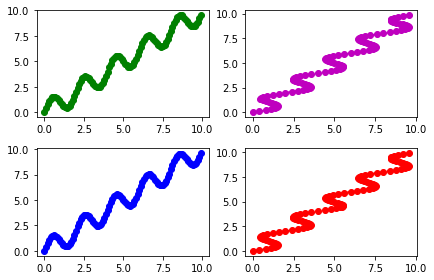

In [47]:
#13. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.
x = np.arange(0,10,0.1)

y = np.sin(np.pi*x) + x
  
fig, axes = plt.subplots(2, 2)
  
axes[0, 0].plot(x, y, 'g--o')
axes[0, 1].plot(y, x, 'm--o')
axes[1, 0].plot(x, y, 'b--o')
axes[1, 1].plot(y, x, 'r--o') 
fig.tight_layout()

In [48]:
#14 Find the number of null values in Blood PressureSystolic column.
amb = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "AmbulatoryVisits")
df_ambl = amb[["BloodPressureSystolic"]]
df_ambl.isnull().sum()

BloodPressureSystolic    124
dtype: int64

In [49]:
#15 Replace all the null values in ReadmissionFlag with 0
df_RF = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "ReAdmissionRegistry")
df_RF.fillna(0,inplace = True)
df_RF

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,0.0,0.0
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,0.0,0.0
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,0.0,0.0
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,0.0,0.0
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,0.0,0.0


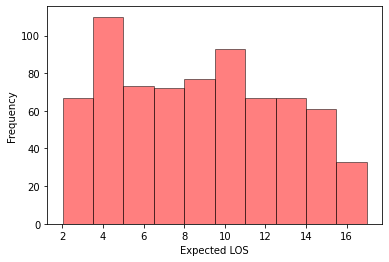

In [51]:
#16. Plot a graph to show the distribution of Expected Length of Stay
discharge = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df_LOS = discharge["ExpectedLOS"]
(df_LOS).head()
plt.hist(df_LOS,bins=10,color='red',alpha=0.5,edgecolor='black')
plt.xlabel('Expected LOS')
plt.ylabel('Frequency')
plt.show()

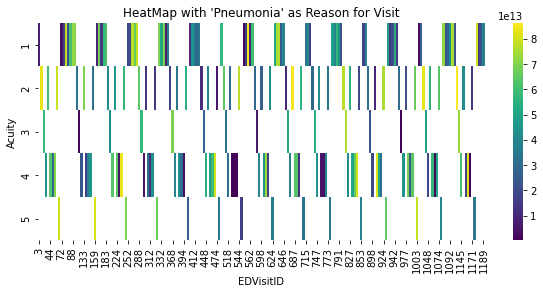

In [52]:
#17.a) Create a heat map to show the correlation between the column values of ED Visits.

edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculating the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Choosing the Reason for Visit as Pneumonia
ed =edm.loc[edm.ReasonForVisit == 'Pneumonia']

#plotting the heatmap
ed = ed.pivot("Acuity","EDVisitID","Timeinhosp")
plt.figure(figsize=(10,4))
plot=sns.heatmap(ed,cmap="viridis")
plt.title("HeatMap with 'Pneumonia' as Reason for Visit")
plt.show()


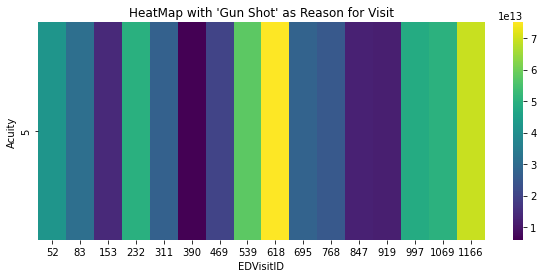

In [53]:
#17.b) Create a heat map to show the correlation between the column values of ED Visits.


edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculating the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Choosing the Reason for Visit as Gun Shot
ed =edm.loc[edm.ReasonForVisit == 'Gun Shot']

#plotting the heatmap
ed = ed.pivot("Acuity","EDVisitID","Timeinhosp")
plt.figure(figsize=(10,4))
plot=sns.heatmap(ed,cmap="viridis")
plt.title("HeatMap with 'Gun Shot' as Reason for Visit")
plt.show()


In [54]:
#18.Add column 'Age' in Patient table.
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
patient['Age'] = df_dob.apply(age)
display(patient)
    

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


In [55]:
#19.Create a dataframe with date and time as columns,where the values are the discharge time from ReAdmission resistry sheet.

readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_dischargetime = readmregistry["DischargeDate"]

#Creating a dataFrame
df = pd.DataFrame(df_dischargetime)
#Splitting the date part 
df["Date"] = [readmregistry.date() for readmregistry in df["DischargeDate"]]
#splitting the time part
df["Time"] = [readmregistry.time() for readmregistry in df["DischargeDate"]]
#Display the dataframe
display(df)


,DischargeDate,Date,Time
0,2018-01-04 19:59:31.391,2018-01-04,19:59:31.391000
1,2018-01-04 21:28:51.898,2018-01-04,21:28:51.898000
2,2018-01-04 22:28:23.672,2018-01-04,22:28:23.672000
3,2018-01-05 05:47:04.933,2018-01-05,05:47:04.933000
4,2018-01-05 14:18:30.029,2018-01-05,14:18:30.029000
...,...,...,...
715,2018-03-07 21:22:10.061,2018-03-07,21:22:10.061000
716,2018-03-08 02:43:18.749,2018-03-08,02:43:18.749000
717,2018-03-08 09:27:18.377,2018-03-08,09:27:18.377000
718,2018-03-10 06:06:12.068,2018-03-10,06:06:12.068000


In [157]:
#20. Count of number of patients admitted based on Primary Diagnosis and Service provided
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","Service","PatientID"]]
df_sort = df_readm.groupby(["PrimaryDiagnosis","Service"]).count()
(df_sort)



PatientID
PrimaryDiagnosis   Service                    
AMI                Cardiology               40
                   Hospitalist               1
                   ICU                       5
                   Neurology                 2
Afib               Cardiology               10
                   ICU                       1
Broken Leg         Cardiology                3
                   General Medicine          3
                   Hospitalist               3
Diabetes           General Medicine         38
                   Hospitalist              26
Fever              General Medicine         13
                   Hospitalist               3
                   ICU                       3
Flu                Cardiology                2
                   General Medicine         54
                   Hospitalist              19
                   ICU                       3
                   Neurology                 2
Heart Failure      Cardiology               39
                   ICU                      33
                   Neurology                 6
Hip Fracture       Orthopeadics             23
Hypertension       General Medicine         35
                   Hospitalist               6
                   ICU                       4
                   Neurology                 5
Kidney Failure     Cardiology                1
                   General Medicine         12
                   Hospitalist               6
                   ICU                       1
Knee Replacement   Hospitalist               1
                   Orthopeadics             22
Laceration         General Medicine         21
                   Hospitalist               7
                   ICU                       1
Migraine           Neurology                12
Pain               Neurology                 7
Pneumonia          General Medicine         67
                   Hospitalist              28
                   ICU                      77
                   Neurology                 5
Spinal Cord Injury ICU                       2
Stroke             General Medicine         20
                   Hospitalist               1
                   ICU                      21
                   Neurology                26

In [59]:
# 21. Which demographic patients are prone to get stroke?
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
patient['Age'] = df_dob.apply(age)


readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_merge = patient[["PatientID","Age","Gender","Race","Language"]].merge(readmregistry[["PatientID","PrimaryDiagnosis"]],
                                                   on = "PatientID",
                                                   how = "inner")
patlist = df_merge.groupby(["Age","Gender","Race","Language"])["PrimaryDiagnosis"].apply(lambda x: (x=='Stroke').sum()).nlargest(1).reset_index(name='Patientcount')
  
display(patlist)

,Age,Gender,Race,Language,Patientcount
0,57,Female,White,English,3


In [61]:
#22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
pivot = df.pivot_table(index =['Acuity', 'EDDisposition'], 
                       values =['PatientID'], aggfunc ='count')
pivot.rename(columns={"PatientID":"No of Patients"}, inplace = True)
print (pivot)

                      No of Patients
Acuity EDDisposition                
1      Admitted                   32
       Discharged                558
2      Admitted                  116
       Discharged                 66
3      Admitted                   81
4      Admitted                  107
       Discharged                 30
5      Admitted                  179
       Discharged                 30


In [60]:
#23. Write a function to find the center element in the list. (one element in odd length list, two elements in even length list).
a=int(input("Number of elements in the array:"))
newlist=list(map(int, input("Enter the elements of the array:-").strip().split()))
print(newlist)
def middle():
    if len(newlist)%2 == 0:
        x=len(newlist)//2-1
        y=(len(newlist)//2)
        print(newlist[x],newlist[y])
    else:
        z=len(newlist)//2
        print(newlist[z])
        
middle()            


Number of elements in the array:8
Enter the elements of the array:-2 4 6 8 7 9 2 4
[2, 4, 6, 8, 7, 9, 2, 4]
8 7


In [57]:
#24 Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df = df.groupby([ 'ReasonForVisit','EDDisposition']
                ).size().unstack(fill_value=0)
  
print("Result: ")
display(df)

result: 


EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39,0
Bleeding,16,15
Car Accident,17,0
Chest Pain,94,15
Cough,0,1
Fever,46,188
Gun Shot,16,0
Intoxication,0,30
Laceration,0,30


<AxesSubplot:>

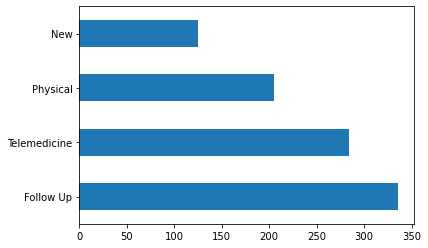

In [58]:
#25.Plot a graph by counting the no. of patients in each department.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df['VisitType'].value_counts().plot(kind='barh')

In [63]:
#26.Using arrays and loops, find the count of patients based on gender.

# create Dataframe for patients worksheet from excel

patientdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Patients")

#Extracting patient Gender Details to Array 
genders=[patientdf.Gender];

#Declaring variables
countofMale=0;
countofFemale=0;


for gender in genders:
    for sex in gender:
        if sex=='Male':
            countofMale =countofMale+1;
        else:
            countofFemale =countofFemale+1;
            
print('Male   Patient(s) count is: '+ f'{countofMale}');
print('Female Patient(s) count is: '+ f'{countofFemale}');

Male   Patient(s) count is: 537
Female Patient(s) count is: 408


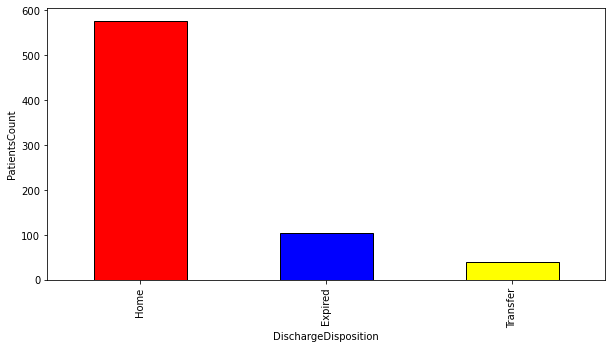

In [64]:
#27.Plot a graph to count the patients based on discharge disposition.

dischargesdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")
fig = plt.figure(figsize = (10, 5))

x=dischargesdf['DischargeDisposition']
y=dischargesdf['DischargeDisposition'].value_counts().plot(kind='bar',color=['red','blue','yellow','green'],edgecolor='black')



# To Put label for axis
plt.xlabel("DischargeDisposition")
plt.ylabel("PatientsCount")
# To show chart
plt.show()

In [72]:
#28.Which reason of visit has maximum mortality rate.

#To create dataframe for to datasheet
edvisitsdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="EDVisits")
dischargesdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")

#To merge 2 data set with common column 

combinedf = edvisitsdf[["PatientID","ReasonForVisit"]].merge(dischargesdf[["PatientID","DischargeDisposition"]],
                                                   on = "PatientID",
                                                   how = "inner")

df_morrate = combinedf.groupby("ReasonForVisit")["DischargeDisposition"].apply(lambda x: (x=='Expired').sum()).nlargest(1).reset_index(name='Patientcount')

print(df_morrate)

  ReasonForVisit  Patientcount
0          Fever            25


In [73]:
#29.Calculate average LOS.

# To use, Mean we have to import statistics module

import statistics as stats

# To create dataframe of readmissionregistry

readmissiondf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="ReAdmissionRegistry")

#def Average(readmissiondf.ExpectedLOS) :
#  return sum(readmissiondf.ExpectedLOS) / len(readmissiondf.ExpectedLOS)

#To calculate average,omport statistics module.
aver=stats.mean(readmissiondf.ExpectedLOS)
      
# Printing average of the LOS
print("Average LOS =", round(aver,2))

Average LOS = 8.82


In [78]:
#30.Which patient id has most entries in readmission registry.

import statistics as stats

#To read the Data Frame
readmissiondf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="ReAdmissionRegistry")

# code for getting patient has Most entries

mostp_id=readmissiondf['PatientID'].mode()

#mostp_id=readmissiondf['PatientID'].value_counts().idxmax()----One more option

# To print result
print("The patient ID with most entries:",mostp_id)


The patient ID with most entries: 0    23
Name: PatientID, dtype: int64


In [79]:
# 31. Find the count of White Spanish Male.
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
demo = print(((patient["Race"]=='White') & (patient["Language"]=='Spanish') & (patient["Gender"]=='Male')).sum())

15


In [89]:
#32 Write a function to print the multipication table of the given number
def print_table(num): 
    """ This function prints multiplication table of a given number"""
    for i in range(1,11): 
        print(num,' x ', i, ' = ',num*i) 
n = int(input("Please Enter a number to print its multiplication table:"))
print_table(n)

Please Enter a number to print its multiplication table:8
8  x  1  =  8
8  x  2  =  16
8  x  3  =  24
8  x  4  =  32
8  x  5  =  40
8  x  6  =  48
8  x  7  =  56
8  x  8  =  64
8  x  9  =  72
8  x  10  =  80


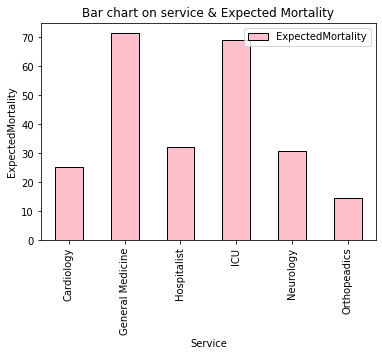

In [3]:
#33 Using a bar chart, which Service had the lowest count of Expected Mortality?
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")
pivot = df.pivot_table(index =['Service'], 
                       values =['ExpectedMortality'], aggfunc ='sum')
pivot
pivot.plot(kind='bar',color='Pink', width=0.5,edgecolor='black')
plt.xlabel("Service")
plt.ylabel("ExpectedMortality")
plt.title("Bar chart on service & Expected Mortality", color= "Black")
plt.show()
                

In [87]:
#34 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.#
a = np.arange(1,31).reshape((6, 5))
a_slice = a[2:4, 0:2]
print(a_slice)

[[11 12]
 [16 17]]


In [88]:
#35 np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.
a = np.arange(1,31).reshape((6, 5))
a = np.diag(a,1)
print(a)

[ 2  8 14 20]


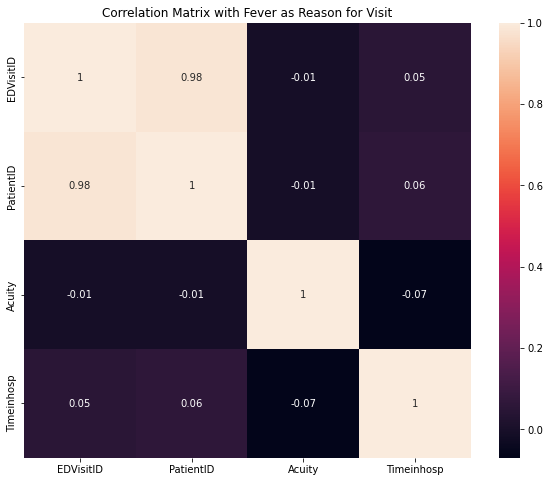

In [90]:
# 36.a) Create a correlation matrix on EDVisits

edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculting the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Correlation Matrix between the columns when the Reason for Visit is 'Fever'
ed =edm.loc[edm.ReasonForVisit == 'Fever']
corr = ed.corr()
corr


plt.figure(figsize=(10,8))
plot=sns.heatmap(ed.corr().round(2),annot = True)

plt.title("Correlation Matrix with Fever as Reason for Visit")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix with ED Disposition is set to Discharged')

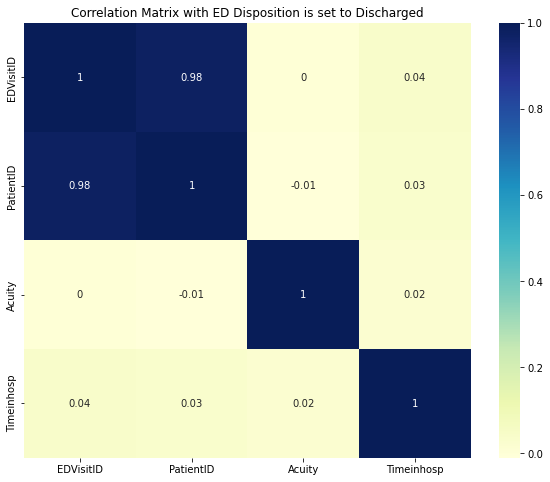

In [96]:
# 36.b) Create a correlation matrix on EDVisits

edm = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Calculating the time spent in hospital by finding the difference between Discharge and Admission time.
edm = edm.assign(Timeinhosp= edm["EDDischargeTime"]-edm["VisitDate"])

#Converting timedelta to float
edm['Timeinhosp'] = edm['Timeinhosp'].to_numpy().astype(float).round(2)

#Correlation Matrix between the columns when the Ed Disposition is 'Discharged'
ed =edm.loc[edm.EDDisposition == 'Discharged']
corr = ed.corr()
corr


plt.figure(figsize=(10,8))
plot=sns.heatmap(ed.corr().round(2),annot = True,cmap='YlGnBu')

plt.title("Correlation Matrix with ED Disposition is set to Discharged")

In [92]:
#37. Write a function to print all the upper case letter of a given sentence.

def print_uppercase(sentence): 
    sent = list(filter(lambda c:c.isupper(),sentence))
    print("The uppercase characters in the string are : " + str(sent))
s = input("Please Enter a String:")
print("The entered string is : " + str(s))
print_uppercase(s)


Please Enter a String:What is Your Name?
The entered string is : What is Your Name?
The uppercase characters in the string are : ['W', 'Y', 'N']


In [93]:
#38. Number of patients on "Transfer" based on Primary Diagnosis.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_count = readmregistry.groupby("PrimaryDiagnosis")["DischargeDisposition"].apply(lambda x: (x=='Transfer').sum()).reset_index(name='Patientcount')
display(df_count)

,PrimaryDiagnosis,Patientcount
0,AMI,0
1,Afib,1
2,Broken Leg,0
3,Diabetes,7
4,Fever,0
5,Flu,2
6,Heart Failure,9
7,Hip Fracture,0
8,Hypertension,0
9,Kidney Failure,0


In [94]:
#39. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. 
#Use EDUnique Sheet for reason for visit.
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
edunique = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDUnique")
df_combined_file = patient[["PatientID","FirstName","LastName","DateOfBirth"]].merge(edunique[["PatientID","ReasonForVisit"]],
                                                   on = "PatientID",
                                                   how = "inner")
display(df_combined_file.query('ReasonForVisit=="Migraine"'))


,PatientID,FirstName,LastName,DateOfBirth,ReasonForVisit
1,2,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...,...
896,897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,908,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,910,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


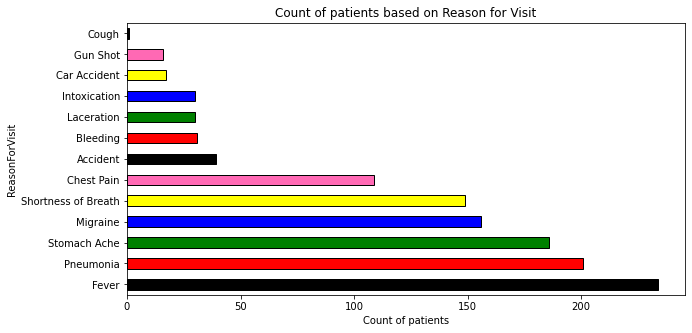

In [97]:
# 40. Plot a graph showing the count of patients for the reason visited the hospital.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
fig = plt.figure(figsize = (10, 5))
x=edvisit["ReasonForVisit"]
y=edvisit["ReasonForVisit"].value_counts().plot(kind='barh',color=['black', 'red', 'green', 'blue', 'yellow','hotpink'],
                                                edgecolor='black')
plt.title("Count of patients based on Reason for Visit")
plt.xlabel("Count of patients")
plt.ylabel("ReasonForVisit")
plt.show()


In [102]:
#41.Find the visit type with maximum 'No Show'.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df_visitstatus = df.loc[df.VisitStatus == "No Show"]
Max_NoShow = df_visitstatus['VisitType'].max()
print('The Visit Type with maximum No Show is - ',Max_NoShow)

The Visit Type with maximum No Show is -  Telemedicine


In [103]:
#42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df
df_f = df.loc[10:20]
df_f.loc[df_f['ProviderSpecialty'] == 'Surgery']

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


In [104]:
#43. Write a regular expression to find all the digits and numbers in the string.
import re
str=input("Enter a String with numbers: \n")
#Create a list to hold the numbers
num_list = re.findall(r'\d+', str)
print(num_list)

Enter a String with numbers: 
Python Hackathon 2022
['2022']


In [105]:
#44.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df["Los"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
pivot = df.pivot_table(index =['Service', 'PrimaryDiagnosis'], 
                       values =['Los'], aggfunc ='mean')
pivot.rename(columns={"Los":"Average Los"}, inplace = True)
print (pivot)

                                     Average Los
Service          PrimaryDiagnosis               
Cardiology       AMI                   10.250000
                 Afib                  11.200000
                 Broken Leg            10.666667
                 Flu                   12.000000
                 Heart Failure          9.512821
                 Kidney Failure         4.000000
General Medicine Broken Leg            13.000000
                 Diabetes              10.289474
                 Fever                  8.000000
                 Flu                    9.888889
                 Hypertension           8.914286
                 Kidney Failure        10.666667
                 Laceration             9.428571
                 Pneumonia              9.417910
                 Stroke                11.250000
Hospitalist      AMI                   10.000000
                 Broken Leg             7.666667
                 Diabetes               8.846154
                 Fev

In [106]:
#45. Calculate mortality by diagnosis.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","DischargeDisposition"]]
mort = df_readm.groupby("PrimaryDiagnosis")["DischargeDisposition"].apply(lambda x: (x=='Expired').sum()).reset_index(name='Mortality count')
display(mort)

,PrimaryDiagnosis,Mortality count
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4
5,Flu,11
6,Heart Failure,16
7,Hip Fracture,3
8,Hypertension,16
9,Kidney Failure,2


In [107]:
#46.Write a code to split a sentence into words using regex.

#To import regex
import string, re

# Create a String of Sentence
s = "Hello Friends ,This is my First Python Hackathon"

# Code for split a sentence into words
re.sub(fr'([{string.punctuation}])\B', r' \1', s).split()

['Hello', 'Friends', ',This', 'is', 'my', 'First', 'Python', 'Hackathon']

In [108]:
#47.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

ambul_df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="AmbulatoryVisits")

# retrieving maximum BPS rows by loc method
rows=ambul_df.loc[(ambul_df.BloodPressureSystolic == max(ambul_df.BloodPressureSystolic))]  

#To display the row with maximum BloodPressureSystolic 
rows

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


In [109]:
#48.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

#To create DataFrame
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")

#To calculate Actual LOS
df["Los"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
#To calculate Average LOS
pivot = df.pivot_table(index =['Service', 'DischargeDisposition'], 
                       values =['Los'], aggfunc ='mean')
#To rename the column name
pivot.rename(columns={"Los":"Average Los"}, inplace = True)
#To show results
print (pivot)

                                       Average Los
Service          DischargeDisposition             
Cardiology       Expired                  8.866667
                 Home                    10.186667
                 Transfer                11.200000
General Medicine Expired                  8.500000
                 Home                     9.772926
                 Transfer                10.687500
Hospitalist      Expired                 10.000000
                 Home                     9.034091
                 Transfer                 8.666667
ICU              Expired                  9.275862
                 Home                     9.127273
                 Transfer                 8.833333
Neurology        Expired                 10.185185
                 Home                     9.194444
                 Transfer                12.000000
Orthopeadics     Expired                 11.800000
                 Home                     8.846154
                 Transfer      

In [110]:
#49.Retrieve the rows where SBP<140 and DBP<80.

#To create DataFrame
ambul_df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="AmbulatoryVisits")

#To retrieve the rows where SBP<140 and DBP<80. 
newdf=ambul_df.loc[(ambul_df.BloodPressureSystolic <140) & (ambul_df.BloodPressureDiastolic <80)]

#To display the rows
newdf

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,2019-03-16,2019-02-26 17:42:39.779,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,2019-01-21,2019-01-07 06:04:17.575,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2019-02-05,2019-01-10 05:43:34.544,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.896818,68.496869,Canceled


In [114]:
#50.Which departmentID has maximum number of visits scheduled.

#To read the Data Frame
ambuldf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="AmbulatoryVisits")

# code for getting patient has Maximum visits

#max_visit=ambuldf['VisitDepartmentID'].mode()-------One more option
max_visit=ambuldf['VisitDepartmentID'].value_counts().idxmax()


# To print result
max_visit

11

In [118]:
# 51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df_ed = edvisit[["PatientID","ReasonForVisit","Acuity"]]
df_ed.loc[((df_ed["ReasonForVisit"] == 'Migraine') |(df_ed["ReasonForVisit"] == 'Pneumonia')) & (df_ed["Acuity"] >= 2)]

,PatientID,ReasonForVisit,Acuity
1,12,Migraine,2
3,14,Migraine,3
11,29,Pneumonia,2
12,30,Pneumonia,3
13,31,Pneumonia,4
...,...,...,...
1107,773,Migraine,2
1150,850,Migraine,2
1152,852,Migraine,2
1160,868,Migraine,2


In [115]:
#52. Retrieve the row with minimum DBP using sorting technique.
df= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")

dbp=df.sort_values("BloodPressureDiastolic")
dbp.head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


In [120]:
#53. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df_ed = edvisit[["ReasonForVisit"]]

#Getting the Reason for Visit from the user
user_input = input("Enter the reason for visit: ")

#Checking the condition and displaying the count
ed = df_ed.loc[df_ed["ReasonForVisit"] == user_input].count()
display(ed)

Enter the reason for visit: Bleeding


ReasonForVisit    31
dtype: int64

In [121]:
#54.Mortality O.E
#Create a calculated field” Observed Mortality” - COUNT( [Discharge Disposition] ='Expired’ )
#Create another calculated field “O: E Mortality”- ([Observed Mortality])/SUM([Expected Mortality]) 
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["DischargeDisposition"]]
df_mort = (df_readm == 'Expired').sum()
df_exp = readmregistry["ExpectedMortality"].sum().round(2)
df_exp
MortalityOE = ((df_mort/df_exp)*100)
#display(MortalityOE)
print("Mortality O:E as per",MortalityOE)

Mortality O:E as per DischargeDisposition    42.726264
dtype: float64


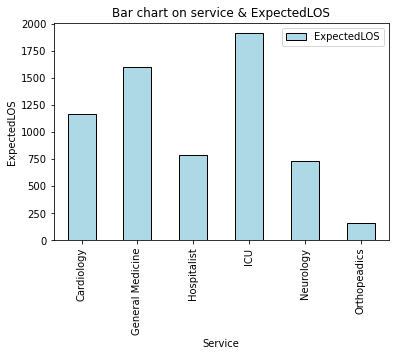

In [2]:
#55 Create a bar chart on service & expected length of stay.
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")
pivot = df.pivot_table(index =['Service'], 
                       values =['ExpectedLOS'], aggfunc ='sum')
pivot
pivot.plot(kind='bar',color='lightblue', width=0.5,edgecolor='black')
plt.xlabel("Service")
plt.ylabel("ExpectedLOS")
plt.title("Bar chart on service & ExpectedLOS", color= "Black")
plt.show()

In [123]:
# 56. Count of Cancelled status.
df_ambulatory = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df_amb = df_ambulatory["VisitStatus"]
print((df_amb == 'Canceled').sum())

60


In [126]:
#57. Find the age prone to get stroke.
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
patient['Age'] = df_dob.apply(age)


readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_merge = patient[["PatientID","Age"]].merge(readmregistry[["PatientID","PrimaryDiagnosis"]],
                                                   on = "PatientID",
                                                   how = "inner")
patlist = df_merge.groupby("Age")["PrimaryDiagnosis"].apply(lambda x: (x=='Stroke').sum()).nlargest(3).reset_index(name='Patientcount')
  
display(patlist)


,Age,Patientcount
0,54,5
1,57,5
2,61,5


In [127]:
#58.Display total count of patients service wise based on gender.
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_combined = patient[["PatientID","Gender"]].merge(readmregistry[["PatientID","Service"]],
                                                   on = "PatientID",
                                                   how = "inner")
patientcount = df_combined.groupby(["Service","Gender"]).count()
  
display(patientcount)

PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23

In [128]:
#59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

provider = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
split_name =provider["ProviderName"].str.split()

#Creating a dataframe
df_name = pd.DataFrame(split_name)

#Splitting the first and last names
df_name["FirstName"] = split_name.str[0] 
df_name["LastName"] = split_name.str[-1] 

#Displaying the dataframe
display(df_name)


,ProviderName,FirstName,LastName
0,"[Sally, Sue]",Sally,Sue
1,"[Mike, Myers]",Mike,Myers
2,"[Jordan, Michael]",Jordan,Michael
3,"[Ted, Texas]",Ted,Texas
4,"[Ala, Bama]",Ala,Bama
5,"[Harry, Kane]",Harry,Kane
6,"[Barry, Bar]",Barry,Bar
7,"[Ted, Green]",Ted,Green
8,"[Ted, Black]",Ted,Black
9,"[Fred, Man]",Fred,Man


In [129]:
#60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#get the expected LOS value from the user
user_input = float(input("Enter the Expected LOS value: "))

#Filtering only the patients with Expected LOS greater than user input.
df_patlist = readmregistry[["PatientID","ExpectedLOS"]]
filt_list = df_patlist.loc[df_patlist["ExpectedLOS"] > user_input]
display(filt_list)

Enter the Expected LOS value: 5


,PatientID,ExpectedLOS
0,1,6.717771
4,6,13.650953
5,7,9.555047
6,8,16.472257
7,9,9.646857
...,...,...
712,735,8.322151
714,737,10.563688
715,738,13.725405
716,739,11.355456


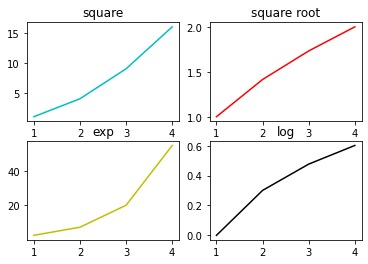

In [130]:
# 61.Plot a graph by multiplotting on the same canvas (Take any set of x & y values)
fig,a =  plt.subplots(2,2)#
x = np.arange(1,5)
a[0][0].plot(x,x*x,'c')
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x),'r')
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x),'y')
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x),'k')
a[1][1].set_title('log')
plt.show()

In [131]:
# 62.Display the data for all 'White Female' patients above the age of 50.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = df["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    df["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
df['Age'] = df_dob.apply(age)

filtered_df = df[(df.Race == 'White') & (df.Gender == 'Female') & (df.Age >= 50)]
filtered_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
25,26,Sally,Bing,1972-08-03 00:05:39.560,Female,White,Spanish,50
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,54
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,61
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,61
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,51
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,58


In [132]:
# 63.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df.loc[101:200,"FirstName":"LastName"]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


In [133]:
# 64."Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)"
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
result = [[0, 0],
           [0,0]]
 
# iterating by row of A
for i in range(len(a)):
 
    # iterating by column by B
    for j in range(len(b[0])):
 
        # iterating by rows of B
        for k in range(len(b)):
            result[i][j] += a[i][k] * b[k][j]
 
for r in result:
    print(r)

[10, 13]
[28, 40]


In [135]:
# 65.Get the number of patients based on service and primary diagnosis.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df = df.groupby([ 'PrimaryDiagnosis','Service']
                ).size().unstack(fill_value=0)
  
print("Result: ")
display(df)

Result: 


Service,Cardiology,General Medicine,Hospitalist,ICU,Neurology,Orthopeadics
PrimaryDiagnosis,,,,,,
AMI,40,0,1,5,2,0
Afib,10,0,0,1,0,0
Broken Leg,3,3,3,0,0,0
Diabetes,0,38,26,0,0,0
Fever,0,13,3,3,0,0
Flu,2,54,19,3,2,0
Heart Failure,39,0,0,33,6,0
Hip Fracture,0,0,0,0,0,23
Hypertension,0,35,6,4,5,0


In [136]:
#66.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.
a=np.arange(1,31).reshape((6, 5))
print(a[np.array([0, 4, 5]), 3:])

[[ 4  5]
 [24 25]
 [29 30]]


In [137]:
#67.Make a pivot table by the no. of patients from the admission date till discharge date.

df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

# Calculating the No.of days from the admission date till discharge date.
df["DaysfromAdmToDis"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days

# Creating Pivot table and getting the count of Patient
pivot = df.pivot_table(index =['DaysfromAdmToDis'], 
                       values =['PatientID'], aggfunc ='count')
# To rename the coulumn name
pivot.rename(columns={"PatientID":"PatientCount"}, inplace = True)

# To display the result
print (pivot)

                  PatientCount
DaysfromAdmToDis              
3                           49
4                           55
5                           50
6                           54
7                           55
8                           43
9                           62
10                          47
11                          37
12                          55
13                          51
14                          49
15                          57
16                          56


In [138]:
#68.Display the data where actual LOS is greater than expected LOS.

#To read the Data Frame
df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="ReAdmissionRegistry")


# To find actual LOS
df["Los"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days

#To find the data where actual LOS is greater than expected LOS
result=df[df['Los']>=df['ExpectedLOS']]

#To print the result
result

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Los
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,4
10,568,12,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0,8
11,107,13,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0,8
14,305,15,2018-01-01,2018-01-10 17:24:37.526,Home,Hospitalist,Hypertension,6.369161,0.646007,NaN,NaN,NaN,9
16,439,17,2018-01-01,2018-01-12 14:16:51.024,Home,Hospitalist,Kidney Failure,8.357081,0.630937,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,533,737,2018-02-22,2018-03-07 19:50:58.083,Home,ICU,Pneumonia,10.563688,0.583075,NaN,NaN,NaN,13
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,14
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,14
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,16


In [139]:
#69.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

Fname=patientdf.FirstName.str.lower() # changing value to lower
Lname=patientdf.LastName.str.lower()  # changing value to lower
 
searchstring = np.char.lower(['lau']) # changing search value to lower

#To search the string
x=[]
for i in searchstring:
    for j in Fname :
        if(j.find(i)!=-1 and j not in x):
            x.append(j)

for i in searchstring:
    for j in Lname :
        if(j.find(i)!=-1 and j not in x):

            x.append(j)
# To print the result
            print(x)

['lauren', 'zulauf', 'klausen']


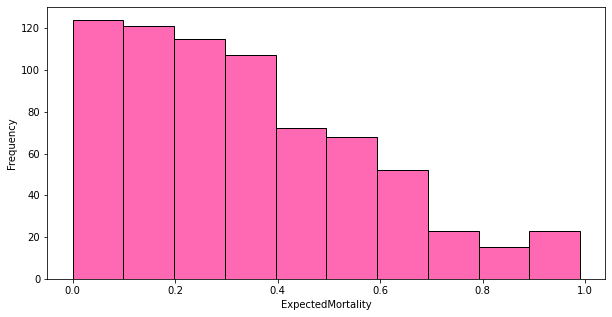

In [2]:
#70.Plot a graph to show the distribution of expected mortality.

readmissiondf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="ReAdmissionRegistry")

# fix size of the chart

fig = plt.figure(figsize = (10, 5))
x=readmissiondf["ExpectedMortality"]


#code for distribution of expected mortality 
plt.hist(x,color='hotpink',edgecolor='black')
plt.xlabel("ExpectedMortality")
plt.ylabel("Frequency")
plt.show()

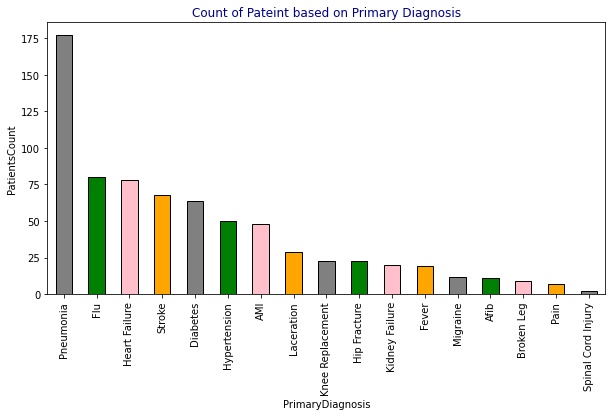

In [146]:
#71 Create a visualization on the count of patients based on primary diagnosis.
dischargesdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")
fig = plt.figure(figsize = (10, 5))

x=dischargesdf['PrimaryDiagnosis']
y=dischargesdf['PrimaryDiagnosis'].value_counts().plot(kind='bar',color=['Grey','green','pink','orange'],edgecolor='black')



# To Put label for axis
plt.xlabel("PrimaryDiagnosis")
plt.ylabel("PatientsCount")
plt.title("Count of Pateint based on Primary Diagnosis", color="darkblue")
# To show chart
plt.show()

In [147]:
# 72. List male patients over the age of 60 who have undergone surgery from January-March 2019.
import pandas as pd
from datetime import datetime,date

#Retrieving the age fron DOB
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))

patient['Age'] = df_dob.apply(age)

provider= pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
amb= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Merging three tables Providers, Ambulatory Visits, Patients
df_merge = patient[["PatientID","Age","Gender"]].merge(edvisit[["EDVisitID","PatientID"]],
                                                   on = "PatientID",
                                                   how = "inner").merge(amb[["ProviderID","PatientMRN","DateofVisit","VisitStatus"]],
                                                   left_on = "PatientID",right_on = "PatientMRN",
                                                   how = "inner").merge(provider[["ProviderID","ProviderSpecialty"]],
                                                                       on = "ProviderID",
                                                                       how = "inner")

#Retreiving only the rows satisfying the filter conditions
df_pat = df_merge.loc[(df_merge["Age"] >60) & (df_merge["Gender"] == 'Male') & (df_merge["ProviderSpecialty"] == 'Surgery') &  
             (df_merge["VisitStatus"] == 'Completed') &  (df_merge["DateofVisit"] > '2019-1-1') & 
             (df_merge["DateofVisit"] < '2019-3-31')]
df_pat



,PatientID,Age,Gender,EDVisitID,ProviderID,PatientMRN,DateofVisit,VisitStatus,ProviderSpecialty
392,581,62,Male,835,11,581,2019-03-01,Completed,Surgery
436,802,61,Male,1056,12,802,2019-02-09,Completed,Surgery
552,19,62,Male,19,16,19,2019-01-16,Completed,Surgery
553,19,62,Male,110,16,19,2019-01-16,Completed,Surgery


In [148]:
# 73. Delete the column 'DischargeDispostion' iteratively.
df_discharge = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")

#deleting the column "DischargeDisposition" iteratively.
for col in df_discharge:
    if "DischargeDisposition" in col:
        del df_discharge[col]

df_discharge 

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,ICU,Heart Failure,13.323413,0.490892


In [6]:
#74 Get the list of ReasonForVisit.
ed_visit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df_pr = ed_visit[["ReasonForVisit"]]
rov = df_pr.groupby(["ReasonForVisit"]).count()
display(rov)

""
ReasonForVisit
Accident
Bleeding
Car Accident
Chest Pain
Cough
Fever
Gun Shot
Intoxication
Laceration


In [149]:
#75. Calculate the time spent in ED Department for each visit.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df_edm =edvisit[["EDVisitID","VisitDate","EDDischargeTime"]]

#Calculating the time spent in Ed Department
df_edm = df_edm.assign(Timeinhosp = df_edm["EDDischargeTime"]-df_edm["VisitDate"])
df_edm

,EDVisitID,VisitDate,EDDischargeTime,Timeinhosp
0,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,0 days 11:20:22.924000
1,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,0 days 23:14:20.215000
2,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,0 days 01:50:56.151000
3,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,0 days 01:20:09.793000
4,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,0 days 02:38:20.043000
...,...,...,...,...
1194,1183,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,0 days 15:53:09.453000
1195,1186,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,0 days 22:27:04.030000
1196,1187,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,0 days 04:30:03.545000
1197,1188,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,0 days 06:10:35.054000


In [151]:
#76.Reverse the string without using inbuilt functions.

#function to find reverse of string
def getreverse(string):
    reverse = ''
    for i in range(len(string), 0, -1):
        reverse += string[i-1]
    return reverse

#get the input
string = input('Enter the string: ')

#calling function
reverse = getreverse(string)
print('The reverse string is',reverse)

Enter the string: Pattern
The reverse string is nrettaP


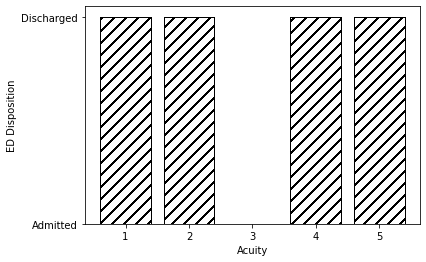

In [153]:
#77.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & 
#make the hatchs onto the bar by using set_hatch() method.

edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

df_new = edvisit[["Acuity","EDDisposition"]]

#dropping duplicates
df_new.drop_duplicates()

#plotting the graph
y=edvisit["EDDisposition"]
x=edvisit["Acuity"]
bars = plt.bar(x,y, edgecolor='black')

#set_hatch method
hatches = ['//' if x>0 else '' for x in x]
for i in range(len(bars)):
   bars[i].set(hatch = hatches[i], fill=False)
                
#adding labels to the graph
plt.xlabel("Acuity")
plt.ylabel("ED Disposition")
plt.show()


In [154]:
#78.Find reasonForVisit with highest count of acuity 5 patients.
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
df_edcount = edvisit.groupby("ReasonForVisit")["Acuity"].apply(lambda x: (x==5).sum()).nlargest(1).reset_index(name='Patientcount')
display(df_edcount)

,ReasonForVisit,Patientcount
0,Chest Pain,61


In [155]:
#79.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","ExpectedLOS"]]
df_diff= df_readm.groupby("PrimaryDiagnosis")["ExpectedLOS"].apply(lambda x: x.max() - x.min()).nlargest(1).reset_index(name='Difference in LOS')
display(df_diff)   

,PrimaryDiagnosis,Difference in LOS
0,Pneumonia,14.83426


In [156]:
#80.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).
provider = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df_pr = provider[["ProviderSpecialty"]]
prspeciality = df_pr.groupby(["ProviderSpecialty"]).sum()
display(prspeciality)

""
ProviderSpecialty
Cardiology
Pediatrics
PrimaryCare
Surgery
